In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# === Load CSV ===
df = pd.read_csv("5000simulations.csv")  # Replace with your file path

In [5]:
# === strips trailing white spaces etc ===
df = df.rename(columns=lambda x: x.strip())

# === Compute A = w_p^2 + w_n^2 ===
df['A'] = df['w_p (mm)']**2 + df['w_n (mm)']**2

# Convert mm² → m² 
df['A'] = df['A'] * 1e-6

# === Compute Qin/A ===
df['Qin_per_A'] = df['flux (W)'] / df['A']

# === Compute efficiency ===
df['efficiency'] = df['PDmax'] / df['Qin_per_A']

# === Filter out unphysical entries ===
df = df[np.isfinite(df['efficiency']) & (df['efficiency'] > 0)]

# === Save cleaned results ===
df.to_csv("comsol_results_with_efficiency.csv", index=False)

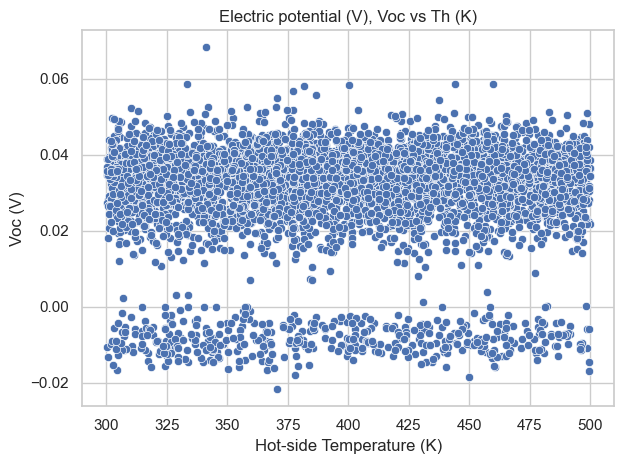

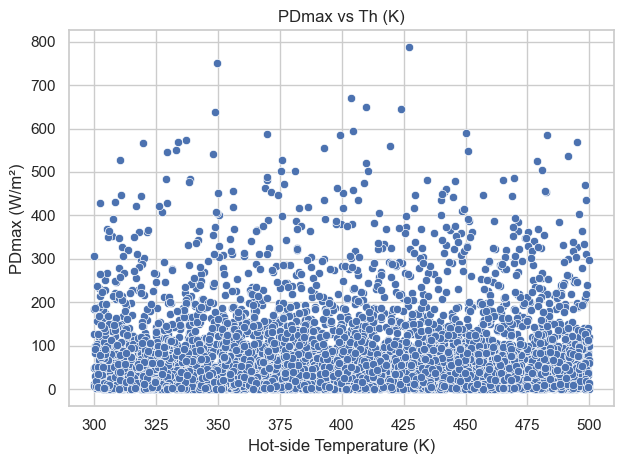

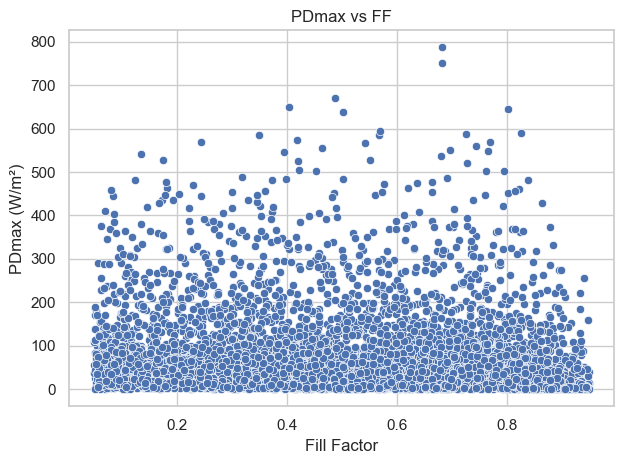

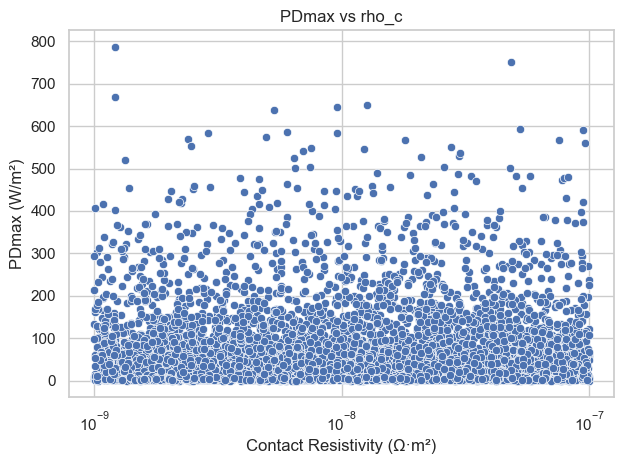

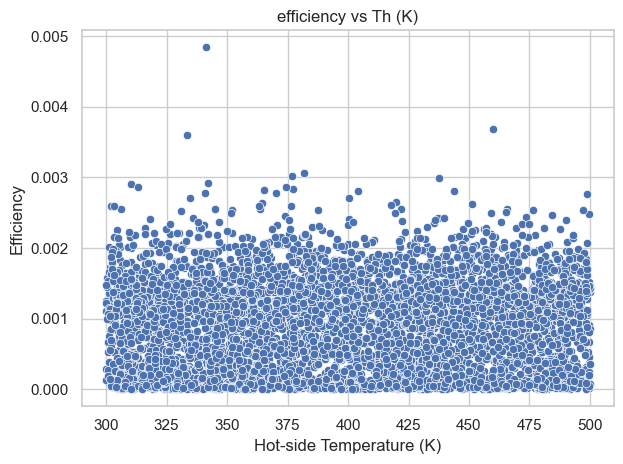

In [8]:
# === Plotting ===
sns.set(style="whitegrid")

def plot(x, y, xlabel=None, ylabel=None, logx=False, title=None):
    plt.figure()
    sns.scatterplot(x=df[x], y=df[y])
    if logx:
        plt.xscale('log')
    plt.xlabel(xlabel if xlabel else x)
    plt.ylabel(ylabel if ylabel else y)
    plt.title(title if title else f"{y} vs {x}")
    plt.tight_layout()
    #plt.savefig(f"{y.replace(' ', '_')}_vs_{x.replace(' ', '_')}.png")
    #plt.close()

# === Generate key plots ===
plot('Th (K)', 'Electric potential (V), Voc', ylabel='Voc (V)', xlabel='Hot-side Temperature (K)')
plot('Th (K)', 'PDmax', ylabel='PDmax (W/m²)', xlabel='Hot-side Temperature (K)')
plot('FF', 'PDmax', ylabel='PDmax (W/m²)', xlabel='Fill Factor')
plot('rho_c', 'PDmax', ylabel='PDmax (W/m²)', xlabel='Contact Resistivity (Ω·m²)', logx=True)
plot('Th (K)', 'efficiency', ylabel='Efficiency', xlabel='Hot-side Temperature (K)')

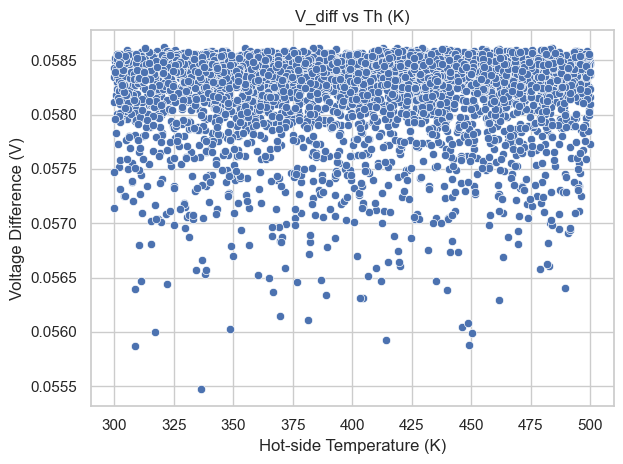

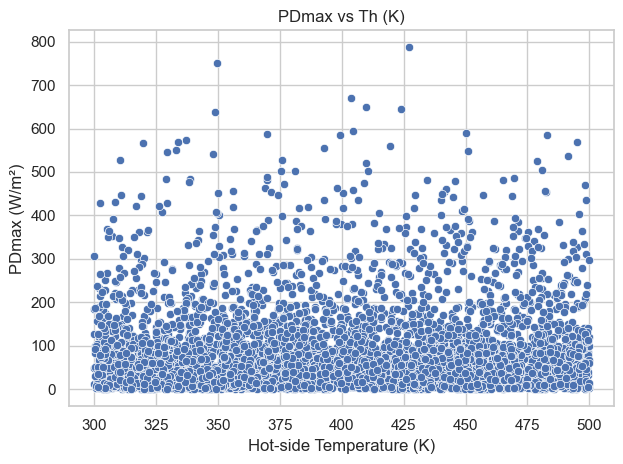

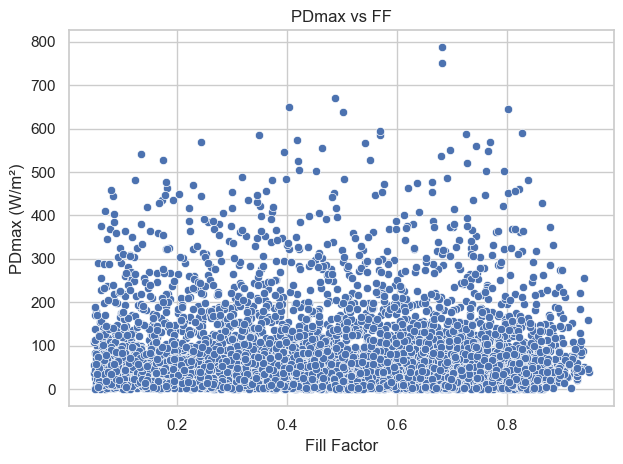

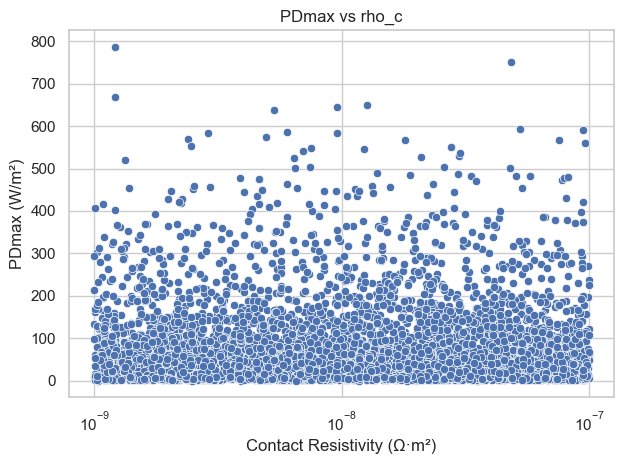

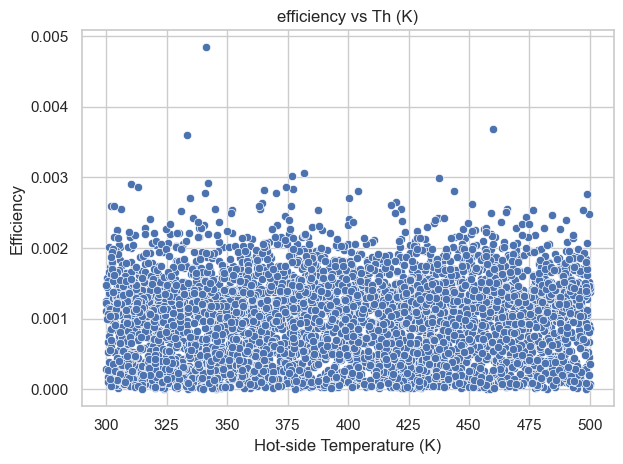

In [6]:

# === Load your CSV ===
df = pd.read_csv("comsol_results_with_efficiency.csv")

# === Clean column names ===
df = df.rename(columns=lambda x: x.strip())

# === Compute area A (in m²) ===
df['A'] = df['w_p (mm)']**2 + df['w_n (mm)']**2
df['A'] = df['A'] * 1e-6

# === Compute Qin/A ===
df['Qin_per_A'] = df['flux (W)'] / df['A']

# === Compute efficiency ===
df['efficiency'] = df['PDmax'] / df['Qin_per_A']

# === Compute V_diff = Voc - Vn ===
df['V_diff'] = df['Electric potential (V), Voc'] - df['Electric potential (V), Vn']

# === Filter out unphysical entries ===
df = df[np.isfinite(df['efficiency']) & (df['efficiency'] > 0)]
# === Remove non-physical entries where V_diff is 0 or negative ===
df = df[df['V_diff'] > 0.01]


# === Save updated CSV ===
df.to_csv("comsol_results_with_vdiff.csv", index=False)

# === Plotting ===
sns.set(style="whitegrid")

def plot(x, y, xlabel=None, ylabel=None, logx=False, title=None):
    plt.figure()
    sns.scatterplot(x=df[x], y=df[y])
    if logx:
        plt.xscale('log')
    plt.xlabel(xlabel if xlabel else x)
    plt.ylabel(ylabel if ylabel else y)
    plt.title(title if title else f"{y} vs {x}")
    plt.tight_layout()
    plt.show()

# === Generate key plots ===
plot('Th (K)', 'V_diff', ylabel='Voltage Difference (V)', xlabel='Hot-side Temperature (K)')
plot('Th (K)', 'PDmax', ylabel='PDmax (W/m²)', xlabel='Hot-side Temperature (K)')
plot('FF', 'PDmax', ylabel='PDmax (W/m²)', xlabel='Fill Factor')
plot('rho_c', 'PDmax', ylabel='PDmax (W/m²)', xlabel='Contact Resistivity (Ω·m²)', logx=True)
plot('Th (K)', 'efficiency', ylabel='Efficiency', xlabel='Hot-side Temperature (K)')


/var/folders/kt/fwst55vj5pv0lfhbwnsfpjd80000gn/T/ipykernel_92868/3755983351.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_vdiff, x=top_vdiff.index.astype(str), y='V_diff', ax=axs[0], palette='Blues_d')
/var/folders/kt/fwst55vj5pv0lfhbwnsfpjd80000gn/T/ipykernel_92868/3755983351.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pdmax, x=top_pdmax.index.astype(str), y='PDmax', ax=axs[1], palette='Reds_d')
/var/folders/kt/fwst55vj5pv0lfhbwnsfpjd80000gn/T/ipykernel_92868/3755983351.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

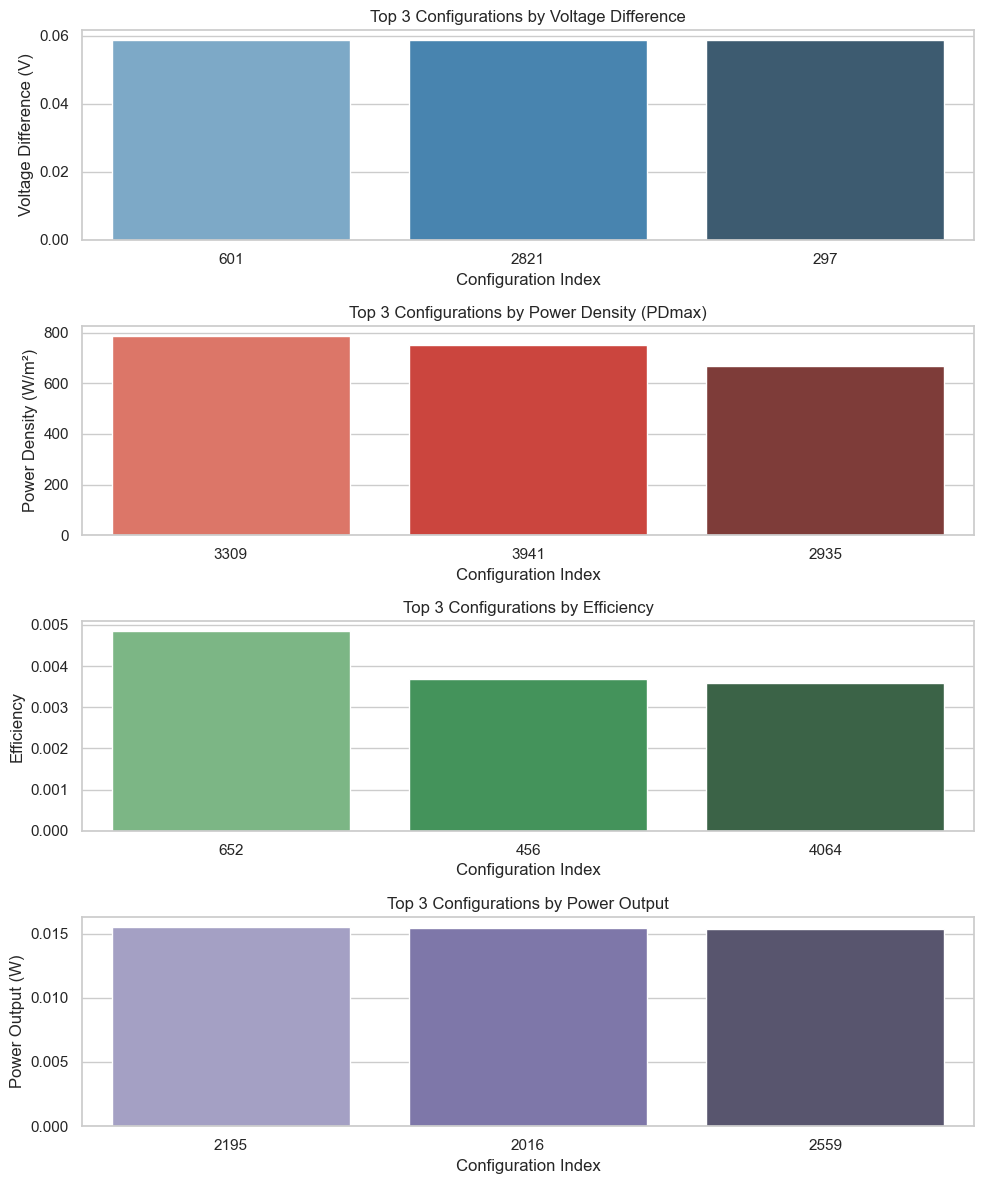


Top 3 Configurations by Each Metric:
Config_ID     Metric   V_diff      PDmax  efficiency  Power_W  LHT (mm)  HIC (mm)  w_p (mm)  w_n (mm)       FF        rho_c     Th (K)
      601     V_diff 0.058619  20.613381    0.000773 0.000031  4.939319  0.764126  0.715854  0.993312 0.534287 1.510000e-09 320.710588
     2821     V_diff 0.058617  53.663508    0.001396 0.000106  4.896531  0.707597  1.238515  0.659765 0.440068 4.050000e-09 354.835488
      297     V_diff 0.058617  47.982824    0.001569 0.000205  4.796894  0.637416  1.398777  1.521643 0.269567 3.400000e-09 413.079697
     3309      PDmax 0.057084 786.868804    0.002031 0.006680  0.502940  1.192564  2.737605  0.997708 0.682472 1.210000e-09 427.262163
     3941      PDmax 0.056702 750.822133    0.002241 0.004379  0.599298  2.387671  2.348794  0.561941 0.682319 4.840000e-08 349.818571
     2935      PDmax 0.057139 669.411741    0.001678 0.008528  0.508965  1.283419  3.492848  0.734708 0.488431 1.220000e-09 403.862128
      652 Efficie

In [7]:
# === Load your COMSOL CSV ===
df = pd.read_csv("comsol_results_with_vdiff.csv")
df.columns = df.columns.str.strip()

# === Compute hot-side area in m² ===
df['A'] = (df['w_p (mm)']**2 + df['w_n (mm)']**2) * 1e-6

# === Compute actual power output in watts ===
df['Power_W'] = df['PDmax'] * df['A']

# === Sort and select top 3 entries for each metric ===
top_vdiff = df.sort_values(by='V_diff', ascending=False).head(3).copy()
top_pdmax = df.sort_values(by='PDmax', ascending=False).head(3).copy()
top_eff = df.sort_values(by='efficiency', ascending=False).head(3).copy()
top_power = df.sort_values(by='Power_W', ascending=False).head(3).copy()

# === Add label for grouping ===
top_vdiff['Metric'] = 'V_diff'
top_pdmax['Metric'] = 'PDmax'
top_eff['Metric'] = 'Efficiency'
top_power['Metric'] = 'Power'

# === Combine into one dataframe for summary ===
top_all = pd.concat([top_vdiff, top_pdmax, top_eff, top_power])
top_all['Config_ID'] = top_all.index.astype(str)

# === Plotting ===
sns.set(style="whitegrid")
fig, axs = plt.subplots(4, 1, figsize=(10, 12))

# Voltage Difference Plot
sns.barplot(data=top_vdiff, x=top_vdiff.index.astype(str), y='V_diff', ax=axs[0], palette='Blues_d')
axs[0].set_title("Top 3 Configurations by Voltage Difference")
axs[0].set_ylabel("Voltage Difference (V)")
axs[0].set_xlabel("Configuration Index")

# PDmax Plot
sns.barplot(data=top_pdmax, x=top_pdmax.index.astype(str), y='PDmax', ax=axs[1], palette='Reds_d')
axs[1].set_title("Top 3 Configurations by Power Density (PDmax)")
axs[1].set_ylabel("Power Density (W/m²)")
axs[1].set_xlabel("Configuration Index")

# Efficiency Plot
sns.barplot(data=top_eff, x=top_eff.index.astype(str), y='efficiency', ax=axs[2], palette='Greens_d')
axs[2].set_title("Top 3 Configurations by Efficiency")
axs[2].set_ylabel("Efficiency")
axs[2].set_xlabel("Configuration Index")

# Power Plot
sns.barplot(data=top_power, x=top_power.index.astype(str), y='Power_W', ax=axs[3], palette='Purples_d')
axs[3].set_title("Top 3 Configurations by Power Output")
axs[3].set_ylabel("Power Output (W)")
axs[3].set_xlabel("Configuration Index")

plt.tight_layout()
plt.show()

# === Display table with full geometry + metric values ===
columns_to_show = [
    'Config_ID', 'Metric', 'V_diff', 'PDmax', 'efficiency', 'Power_W',
    'LHT (mm)', 'HIC (mm)', 'w_p (mm)', 'w_n (mm)', 'FF', 'rho_c', 'Th (K)'
]
top_summary = top_all[columns_to_show]

# Print to console
print("\nTop 3 Configurations by Each Metric:")
print(top_summary.to_string(index=False))
top_summary.to_csv("comsol_best_configs.csv", index=False)